# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# Generate Dataset

In [2]:
a = 2.0
b = 3.0
c = 4.0

n = 100

# x = np.linspace(-6, 5, n)
# noise = np.random.normal(-2, 2, n)
# y = a * x**2 + b * x + c + noise

# # generate a sample DataFrame
# data = { 'x': x,  'y': y }

# df = pd.DataFrame(data)

# # write to Excel file
# df.to_excel('data-set.xlsx', index=False)

# # plot
# plt.scatter(x, y, label='Data Points', color='blue')

# plt.xlabel('X')
# plt.ylabel('Y')

# plt.legend()
# plt.show()



# Read From Excel file

In [3]:
# Read the Excel file into a DataFrame
df = pd.read_excel('data-set.xlsx')
x=df.x
y=df.y

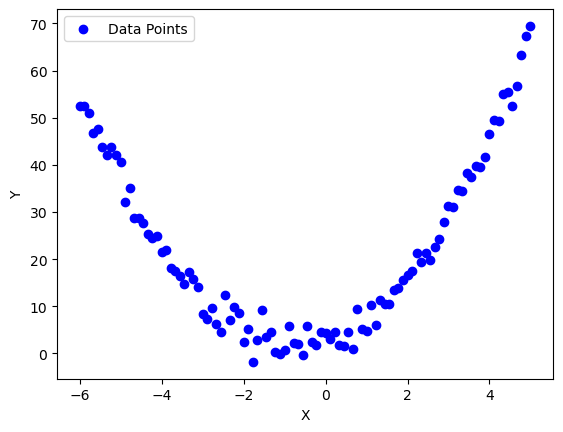

In [6]:
plt.scatter(x, y, label='Data Points', color='blue')
plt.xlabel('X')
plt.ylabel('Y')

plt.legend()
plt.show()

# Initializa Parameters

In [7]:
a_init = np.random.rand(1)
b_init = np.random.rand(1)
c_init = np.random.rand(1)

default_learning_rate = 0.001
epochs = 100000

# generate all random-indexes

In [33]:
# random_indexes = np.random.randint(0,len(x),epochs)
# for i in random_indexes:
#     print(i)

In [34]:
def SGD(a,b,c,learning_rate):
    for epoch in range(epochs):

        random_index = random_indexes[epoch]

        x_i = x[random_index]
        y_i = y[random_index]
        y_pred = a * x_i**2 + b * x_i + c
        error = (y_i - y_pred)
        
        da =  error * -1 * x_i**2
        db =  error * -1 * x_i
        dc =  error * -1 * 1

        a = a - learning_rate * da
        b = b - learning_rate * db
        c = c - learning_rate * dc
    return a,b,c

a_SGD,b_SGD,c_SGD = SGD(a_init,b_init,c_init,default_learning_rate)
print("SGD Trained a:", a_SGD)
print("SGD Trained b:", b_SGD)
print("SGD Trained c:", c_SGD)

# SGD Trained weight: [1.9465887]
# SGD Trained bias: [2.98970753]
# [5.20275979]

SGD Trained a: [1.98047469]
SGD Trained b: [2.9737046]
SGD Trained c: [2.74525795]
[5.20275979]


In [73]:
def Momentum(a,b,c,learning_rate):
    va = 0
    vb = 0
    vc = 0
    beta = 0.9
    for epoch in range(epochs):

        random_index = random_indexes[epoch]

        x_i = x[random_index]
        y_i = y[random_index]
        y_pred = a * x_i**2 + b * x_i + c
        error = (y_i - y_pred)

        da =  error * -1 * x_i**2
        db =  error * -1 * x_i
        dc =  error * -1 * 1
        
        va = beta * va + (1 - beta) * da 
        vb = beta * vb + (1 - beta) * db 
        vc = beta * vc + (1 - beta) * dc 

        a = a - learning_rate * va
        b = b - learning_rate * vb
        c = c - learning_rate * vc


    return a,b,c

a_Momentum,b_Momentum,c_Momentum = Momentum(a_init,b_init,c_init,default_learning_rate)
print("Momentum Trained a:", a_Momentum)
print("Momentum Trained b:", b_Momentum)
print("Momentum Trained c:", c_Momentum)

Momentum Trained a: [1.97668364]
Momentum Trained b: [2.9525103]
Momentum Trained c: [2.7719887]


In [76]:
def Nesterov(a,b,c,learning_rate):
    va = 0
    vb = 0
    vc = 0
    beta = 0.9
    for epoch in range(epochs):

        random_index = random_indexes[epoch]

        x_i = x[random_index]
        y_i = y[random_index]
        
        astar = a - learning_rate * va
        bstar = b - learning_rate * vb
        
        # Forward propagation with projected weight
        y_pred = astar * x_i**2 + bstar * x_i + c
        error = (y_i - y_pred)

        dastar =  error * -1 * x_i**2
        dbstar =  error * -1 * x_i
        dcstar =  error * -1 * 1
        
        
        
        va = beta * va + (1 - beta) * dastar      
        vb = beta * vb + (1 - beta) * dbstar
        vc = beta * vc + (1 - beta) * dcstar
        
        a = a - learning_rate * va
        b = b - learning_rate * vb
        c = c - learning_rate * vc
        
    return a,b,c

a_Nesterov,b_Nesterov,c_Nesterov = Nesterov(a_init,b_init,c_init,default_learning_rate)
print("Nesterov Trained a:", a_Nesterov)
print("Nesterov Trained b:", b_Nesterov)
print("Nesterov Trained c:", c_Nesterov)

Nesterov Trained a: [0.49512278]
Nesterov Trained b: [0.3624873]
Nesterov Trained c: [0.40448586]


In [108]:
def AdaGrad(a,b,c,learning_rate):
    sa = 0
    sb = 0
    sc = 0
    epsilon = 0.000001
    
    for epoch in range(epochs):
        random_index = random_indexes[epoch]

        x_i = x[random_index]
        y_i = y[random_index]
        y_pred = a * x_i**2 + b * x_i + c
        error = (y_i - y_pred)
        
        da =  error * -1 * x_i**2
        db =  error * -1 * x_i
        dc =  error * -1 * 1
        
        sa = sa + da ** 2
        sb = sb + db ** 2
        sc = sc + dc ** 2

        a = a - (learning_rate / math.sqrt(sa+epsilon))* da
        b = b - (learning_rate / math.sqrt(sb+epsilon)) * db
        c = c - (learning_rate / math.sqrt(sc+epsilon)) * dc

    return a,b,c

AdaGrad_learning_rate = 0.01
a_AdaGrad,b_AdaGrad,c_AdaGrad = AdaGrad(a_init,b_init,c_init,AdaGrad_learning_rate)
# a_AdaGrad,b_AdaGrad,c_AdaGrad = AdaGrad(a_init,b_init,c_init,default_learning_rate)
print("AdaGrad Trained a:", a_AdaGrad)
print("AdaGrad Trained b:", b_AdaGrad)
print("AdaGrad Trained c:", c_AdaGrad)

AdaGrad Trained a: [1.90048543]
AdaGrad Trained b: [2.18098773]
AdaGrad Trained c: [2.39145282]


In [113]:
def RMSprop(a,b,c,learning_rate):
    sa = 0
    sb = 0
    sc = 0
    epsilon = 0.000001
    beta = 0.9
    for epoch in range(epochs):
        
        random_index = random_indexes[epoch]

        x_i = x[random_index]
        y_i = y[random_index]
        y_pred = a * x_i**2 + b * x_i + c
        error = (y_i - y_pred)
        
        da =  error * -1 * x_i**2
        db =  error * -1 * x_i
        dc =  error * -1 * 1
        
        sa = beta * sa +(1-beta) * (da ** 2)
        sb = beta * sb +(1-beta) * (db ** 2)
        sc = beta * sc +(1-beta) * (dc ** 2)

        a = a - (learning_rate / math.sqrt(sa+epsilon))* da
        b = b - (learning_rate / math.sqrt(sb+epsilon)) * db
        c = c - (learning_rate / math.sqrt(sc+epsilon)) * dc
    return a,b,c

a_RMSprop,b_RMSprop,c_RMSprop = RMSprop(a_init,b_init,c_init,default_learning_rate)
print("RMSprop Trained a:", a_RMSprop)
print("RMSprop Trained b:", b_RMSprop)
print("RMSprop Trained c:", c_RMSprop)

RMSprop Trained a: [1.96124409]
RMSprop Trained b: [2.96361472]
RMSprop Trained c: [2.71452953]


In [18]:
def Adadelta(a,b,c):
    sa = 0
    sb = 0
    sc = 0
    
    Da_current = 0
    Db_current = 0
    Dc_current = 0
    
    Da_past = 0
    Db_past = 0
    Dc_past = 0
    
    apast = 0
    bpast = 0
    cpast = 0
    
    epsilon = 0.000001
    beta = 0.95
    for epoch in range(epochs):
        random_index = random_indexes[epoch]

        x_i = x[random_index]
        y_i = y[random_index]
        y_pred = a * x_i**2 + b * x_i + c
        error = (y_i - y_pred)
        
        da =  error * -1 * x_i**2
        db =  error * -1 * x_i
        dc =  error * -1 * 1
        
        sa = beta * sa +(1-beta) * (da ** 2)
        sb = beta * sb +(1-beta) * (db ** 2)
        sc = beta * sc +(1-beta) * (dc ** 2)
        
        apast = a
        bpast = b 
        cpast = c
            
        if(epoch == 0):
            
            a = a - (math.sqrt(epsilon) / math.sqrt(sa+epsilon))* da
            b = b - (math.sqrt(epsilon) / math.sqrt(sb+epsilon)) * db
            c = c - (math.sqrt(epsilon) / math.sqrt(sc+epsilon)) * dc
        
        else:
            delta_a = a - apast
            delta_b = b - bpast
            delta_c = c - bpast
                     
            a = a - (math.sqrt(Da_past+epsilon) / math.sqrt(sa+epsilon))* da
            b = b - (math.sqrt(Db_past + epsilon) / math.sqrt(sb+epsilon)) * db
            c = c - (math.sqrt(Dc_past + epsilon) / math.sqrt(sc+epsilon)) * dc
            
            Da_current = beta * Da_past + (1 - beta) * (delta_a)**2
            Db_current = beta * Db_past + (1 - beta) * (delta_b)**2
            Dc_current = beta * Dc_past + (1 - beta) * (delta_c)**2
              
        Da_past = Da_current
        Db_past = Db_current
        Dc_past = Dc_current
    return a,b,c

a_Adadelta,b_Adadelta,c_Adadelta = Adadelta(a_init,b_init,c_init)
print("Adadelta Trained a:", a_Adadelta)
print("Adadelta Trained b:", b_Adadelta)
print("Adadelta Trained c:", c_Adadelta)

Adadelta Trained a: [1.95213789]
Adadelta Trained b: [2.9431028]
Adadelta Trained c: [0.99006333]


In [116]:
def Adam(a,b,c,learning_rate):
    sa = 0
    sb = 0
    sc = 0
    
    va = 0
    vb = 0
    vc = 0
    
    va_hat = 0
    vb_hat = 0
    vc_hat = 0
    
    sa_hat = 0
    sb_hat = 0
    sc_hat = 0
    
    epsilon = 0.00000001
    beta1 = 0.9
    beta2 = 0.999

    for epoch in range(1,epochs+1):
        random_index = random_indexes[epoch-1]

        x_i = x[random_index]
        y_i = y[random_index]
        y_pred = a * x_i**2 + b * x_i + c
        error = (y_i - y_pred)
        
        da =  error * -1 * x_i**2
        db =  error * -1 * x_i
        dc =  error * -1 * 1
           
        va = beta1 * va + (1 - beta1) * da 
        vb = beta1 * vb + (1 - beta1) * db 
        vc = beta1 * vc + (1 - beta1) * dc
        
        va_hat = va/(1-beta1**epoch)
        vb_hat = vb/(1-beta1**epoch)
        vc_hat = vc/(1-beta1**epoch)
        
        
        sa = beta2 * sa +(1-beta2) * (da ** 2)
        sb = beta2 * sb +(1-beta2) * (db ** 2)
        sc = beta2 * sc +(1-beta2) * (dc ** 2)
        
        sa_hat = sa/(1-beta2**epoch)
        sb_hat = sb/(1-beta2**epoch)
        sc_hat = sc/(1-beta2**epoch)
                
        a = a - (learning_rate / (math.sqrt(sa_hat)+epsilon)) * va_hat
        b = b - (learning_rate / (math.sqrt(sb_hat)+epsilon)) * vb_hat
        c = c - (learning_rate / (math.sqrt(sb_hat)+epsilon)) * vc_hat
    return a,b,c

a_Adam,b_Adam,c_Adam = Adam(a_init,b_init,c_init,default_learning_rate)
print("Adam Trained a:", a_Adam)
print("Adam Trained b:", b_Adam)
print("Adam Trained c:", c_Adam)

Adam Trained a: [1.96138799]
Adam Trained b: [2.95866984]
Adam Trained c: [2.71813376]


In [115]:

# a2 = 0.001
# aaa,bbb,ccc = Adam(a_init,b_init,c_init,a2)
# MSE_1 = CalculateMSE(x,y,aaa,bbb,ccc)
# print(MSE_1)

[5.14508299]


In [19]:
def AdaMax(a,b,c,learning_rate):
    sa = 0
    sb = 0
    sc = 0
    
    va = 0
    vb = 0
    vc = 0
    
    va_hat = 0
    vb_hat = 0
    vc_hat = 0
    
    sa_hat = 0
    sb_hat = 0
    sc_hat = 0
    
    beta1 = 0.9
    beta2 = 0.999
    
    for epoch in range(1,epochs+1):
        random_index = random_indexes[epoch-1]

        x_i = x[random_index]
        y_i = y[random_index]
        y_pred = a * x_i**2 + b * x_i + c
        error = (y_i - y_pred)
        
        da =  error * -1 * x_i**2
        db =  error * -1 * x_i
        dc =  error * -1 * 1
        
        va = beta1 * va + (1 - beta1) * da 
        vb = beta1 * vb + (1 - beta1) * db 
        vc = beta1 * vc + (1 - beta1) * dc 
     
        va_hat = va/(1-beta1**epoch)
        vb_hat = vb/(1-beta1**epoch)
        vc_hat = vc/(1-beta1**epoch)
        
        sa = max(beta2 * sa, abs(da))
        sb = max(beta2 * sb, abs(db))
        sc = max(beta2 * sc, abs(dc))
        
        sa_hat = sa/(1-beta2)
        sb_hat = sb/(1-beta2)
        sc_hat = sc/(1-beta2)
                
        a = a - (learning_rate / sa) * va_hat
        b = b - (learning_rate / sb) * vb_hat
        c = c - (learning_rate / sc) * vc_hat
    return a,b,c

AdaMax_learning_rate = 0.002
a_AdaMax,b_AdaMax,c_AdaMax = AdaMax(a_init,b_init,c_init,default_learning_rate)
print("AdaMax Trained a:", a_AdaMax)
print("AdaMax Trained b:", b_AdaMax)
print("AdaMax Trained c:", c_AdaMax)

AdaMax Trained a: [1.95924387]
AdaMax Trained b: [2.97632597]
AdaMax Trained c: [2.70329841]


In [20]:
def Nadam(a,b,c,learning_rate):
    sa = 0
    sb = 0
    sc = 0
    
    va = 0
    vb = 0
    vc = 0
    
    va_hat = 0
    vb_hat = 0
    vc_hat = 0
    
    sa_hat = 0
    sb_hat = 0
    sc_hat = 0
    
    epsilon = 0.0000001
    beta1 = 0.9
    beta2 = 0.999

    for epoch in range(1,epochs+1): 
        random_index = random_indexes[epoch-1]

        x_i = x[random_index]
        y_i = y[random_index]
        y_pred = a * x_i**2 + b * x_i + c
        error = (y_i - y_pred)
        
        da =  error * -1 * x_i**2
        db =  error * -1 * x_i
        dc =  error * -1 * 1
        
        
        va = beta1 * va + (1 - beta1) * da 
        vb = beta1 * vb + (1 - beta1) * db 
        vc = beta1 * vc + (1 - beta1) * dc 
        
        va_hat = va/(1-beta1**epoch)
        vb_hat = vb/(1-beta1**epoch)
        vc_hat = vc/(1-beta1**epoch)
        
        
        sa = beta2 * sa +(1-beta2) * (da ** 2)
        sb = beta2 * sb +(1-beta2) * (db ** 2)
        sc = beta2 * sc +(1-beta2) * (dc ** 2)
        
        sa_hat = sa/(1-beta2**epoch)
        sb_hat = sb/(1-beta2**epoch)
        sc_hat = sc/(1-beta2**epoch)
                
        a = a - (learning_rate / (math.sqrt(sa_hat)+epsilon))* (beta1*va_hat+((1-beta1)/(1-beta1**epoch))*da)
        b = b - (learning_rate / (math.sqrt(sb_hat)+epsilon)) * (beta1*vb_hat+((1-beta1)/(1-beta1**epoch))*db)
        c = c - (learning_rate / (math.sqrt(sc_hat)+epsilon)) * (beta1*vc_hat+((1-beta1)/(1-beta1**epoch))*dc)
    return a,b,c

#Nadam_learning_rate = 0.002
a_Nadam,b_Nadam,c_Nadam = Nadam(a_init,b_init,c_init,default_learning_rate)
print("Nadam Trained a:", a_Nadam)
print("Nadam Trained b:", b_Nadam)
print("Nadam Trained c:", c_Nadam)

Nadam Trained a: [1.96110682]
Nadam Trained b: [2.95864862]
Nadam Trained c: [2.73030964]


In [21]:
def AMSGrad(a,b,c,learning_rate):
    sa = 0
    sb = 0
    sc = 0
    
    va = 0
    vb = 0
    vc = 0
    
    va_hat = 0
    vb_hat = 0
    vc_hat = 0
    
    sa_hat = 0
    sb_hat = 0
    sc_hat = 0
    
    epsilon = 0.0000001
    beta1 = 0.9
    beta2 = 0.999
    for epoch in range(1,epochs+1):
        random_index = random_indexes[epoch-1]

        x_i = x[random_index]
        y_i = y[random_index]
        y_pred = a * x_i**2 + b * x_i + c
        error = (y_i - y_pred)
        
        da =  error * -1 * x_i**2
        db =  error * -1 * x_i
        dc =  error * -1 * 1
        
        va = beta1 * va + (1 - beta1) * da 
        vb = beta1 * vb + (1 - beta1) * db        
        vc = beta1 * vc + (1 - beta1) * dc        
    
        sa = beta2 * sa +(1-beta2) * (da ** 2)
        sb = beta2 * sb +(1-beta2) * (db ** 2)
        sc = beta2 * sc +(1-beta2) * (dc ** 2)
        
        sa_hat = max(sa,sa_hat)
        sb_hat = max(sb,sb_hat)
        sc_hat = max(sc,sc_hat)
                
        a = a - (learning_rate / (math.sqrt(sa_hat)+epsilon)) * va
        b = b - (learning_rate / (math.sqrt(sb_hat)+epsilon)) * vb
        c = c - (learning_rate / (math.sqrt(sc_hat)+epsilon)) * vc
    return a,b,c

a_AMSGrad,b_AMSGrad,c_AMSGrad = AMSGrad(a_init,b_init,c_init,default_learning_rate)
print("AMSGrad Trained a:", a_AMSGrad)
print("AMSGrad Trained b:", b_AMSGrad)
print("AMSGrad Trained c:", c_AMSGrad)

AMSGrad Trained a: [1.95820365]
AMSGrad Trained b: [2.97696097]
AMSGrad Trained c: [2.72069202]


In [30]:
def CalculateMSE(x,y,a,b,c):
    sigma_error = 0
    for i in range(len(x)):
        x_i = x[i]
        y_i = y[i]
        y_pred = a * x_i**2 + b * x_i + c
        error = (y_i - y_pred)
        sigma_error +=error**2

    MSE = sigma_error/n
    return MSE

SGD_MSE = CalculateMSE(x,y,a_SGD,b_SGD,c_SGD)
Momentum_MSE = CalculateMSE(x,y,a_Momentum,b_Momentum,c_Momentum)
Nesterov_MSE =  CalculateMSE(x,y,a_Nesterov,b_Nesterov,c_Nesterov)
AdaGrad_MSE =   CalculateMSE(x,y,a_AdaGrad,b_AdaGrad,c_AdaGrad)
RMSprop_MSE =   CalculateMSE(x,y,a_RMSprop,b_RMSprop,c_RMSprop)
Adadelta_MSE =   CalculateMSE(x,y,a_Adadelta,b_Adadelta,c_Adadelta)
Adam_MSE =  CalculateMSE(x,y,a_Adam,b_Adam,b_Adam)
AdaMax_MSE =   CalculateMSE(x,y,a_AdaMax,b_AdaMax,c_AdaMax)
Nadam_MSE =   CalculateMSE(x,y,a_Nadam,b_Nadam,c_Nadam)
AMSGrad_MSE = CalculateMSE(x,y,a_AMSGrad,b_AMSGrad,c_AMSGrad)

print('SGD_MSE: ',SGD_MSE)
print('Momentum_MSE: ',Momentum_MSE)
print('Nesterov_MSE: ',Nesterov_MSE)
print('AdaGrad_MSE: ',AdaGrad_MSE)
print('RMSprop_MSE: ',RMSprop_MSE)
print('Adadelta_MSE: ',Adadelta_MSE)
print('Adam_MSE: ', Adam_MSE)
print('AdaMax_MSE: ', AdaMax_MSE)
print('Nadam_MSE: ', Nadam_MSE)
print('AMSGrad_MSE: ', AMSGrad_MSE)


SGD_MSE:  [5.20275979]
Momentum_MSE:  [5.25127621]
Nesterov_MSE:  [5.28401892]
AdaGrad_MSE:  [279.22943543]
RMSprop_MSE:  [5.09480808]
Adadelta_MSE:  [8.290459]
Adam_MSE:  [5.16949857]
AdaMax_MSE:  [5.09313666]
Nadam_MSE:  [5.09695265]
AMSGrad_MSE:  [5.0930612]


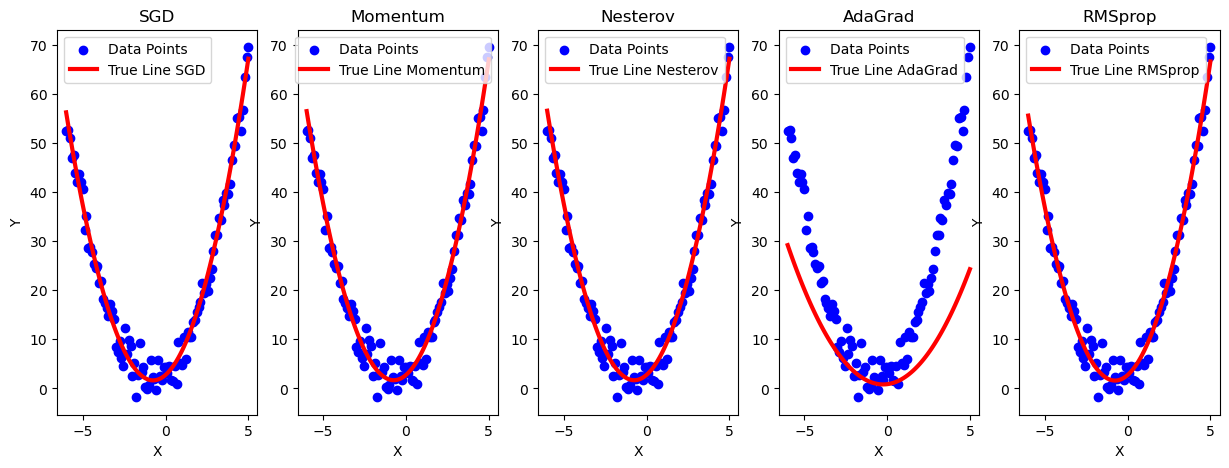

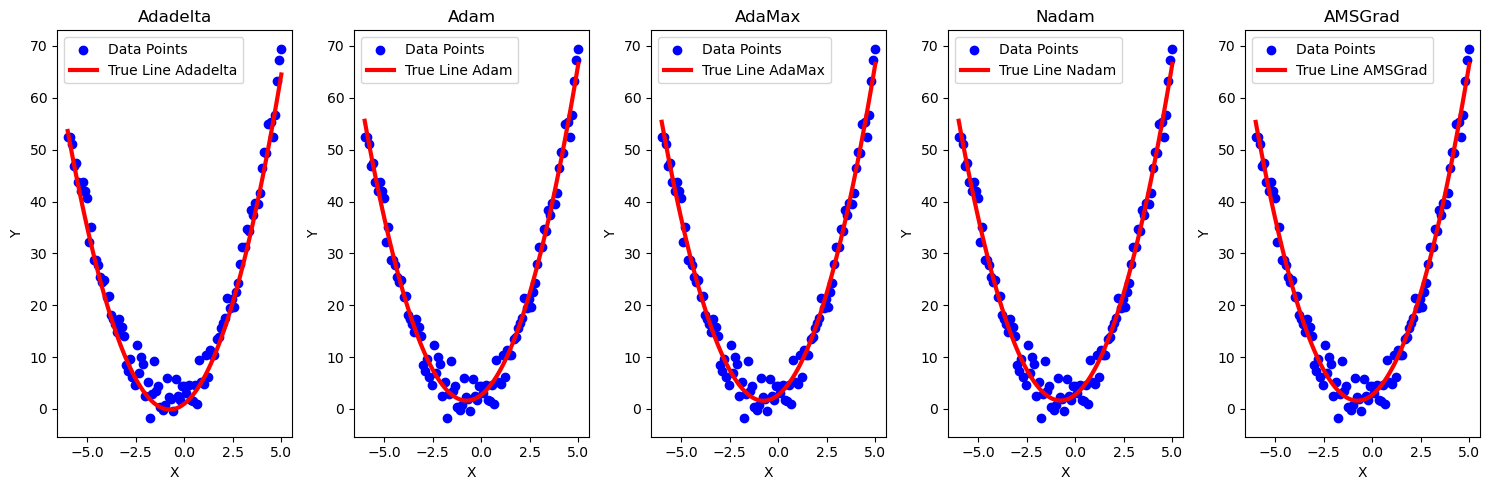

In [31]:
fig, axes_up = plt.subplots(1, 5, figsize=(15, 5))
axes_up[0].scatter(x, y, label='Data Points', color='blue') 
axes_up[0].plot(x, a_SGD * x**2 + b_SGD*x+c_SGD, label=f'True Line SGD', color='red', linestyle='-', linewidth=3)
axes_up[0].set_xlabel('X')
axes_up[0].set_ylabel('Y')
axes_up[0].set_title('SGD')
axes_up[0].legend()

axes_up[1].scatter(x, y, label='Data Points', color='blue') 
axes_up[1].plot(x, a_Momentum * x**2 + b_Momentum*x+c_Momentum, label=f'True Line Momentum', color='red', linestyle='-', linewidth=3)
axes_up[1].set_xlabel('X')
axes_up[1].set_ylabel('Y')
axes_up[1].set_title('Momentum')
axes_up[1].legend()

axes_up[2].scatter(x, y, label='Data Points', color='blue') 
axes_up[2].plot(x, a_Nesterov * x**2 + b_Nesterov*x+c_Nesterov, label=f'True Line Nesterov', color='red', linestyle='-', linewidth=3)
axes_up[2].set_xlabel('X')
axes_up[2].set_ylabel('Y')
axes_up[2].set_title('Nesterov')
axes_up[2].legend()

axes_up[3].scatter(x, y, label='Data Points', color='blue') 
axes_up[3].plot(x, a_AdaGrad * x**2 + b_AdaGrad*x+c_AdaGrad, label=f'True Line AdaGrad', color='red', linestyle='-', linewidth=3)
axes_up[3].set_xlabel('X')
axes_up[3].set_ylabel('Y')
axes_up[3].set_title('AdaGrad')
axes_up[3].legend()

axes_up[4].scatter(x, y, label='Data Points', color='blue') 
axes_up[4].plot(x, a_RMSprop * x**2 + b_RMSprop*x+c_RMSprop, label=f'True Line RMSprop', color='red', linestyle='-', linewidth=3)
axes_up[4].set_xlabel('X')
axes_up[4].set_ylabel('Y')
axes_up[4].set_title('RMSprop')
axes_up[4].legend()


fig, axes_down = plt.subplots(1, 5, figsize=(15, 5))
axes_down[0].scatter(x, y, label='Data Points', color='blue') 
axes_down[0].plot(x, a_Adadelta * x**2 + b_Adadelta*x+c_Adadelta, label=f'True Line Adadelta', color='red', linestyle='-', linewidth=3)
axes_down[0].set_xlabel('X')
axes_down[0].set_ylabel('Y')
axes_down[0].set_title('Adadelta')
axes_down[0].legend()

axes_down[1].scatter(x, y, label='Data Points', color='blue') 
axes_down[1].plot(x, a_Adam * x**2 + b_Adam*x+c_Adam, label=f'True Line Adam', color='red', linestyle='-', linewidth=3)
axes_down[1].set_xlabel('X')
axes_down[1].set_ylabel('Y')
axes_down[1].set_title('Adam')
axes_down[1].legend()

axes_down[2].scatter(x, y, label='Data Points', color='blue') 
axes_down[2].plot(x, a_AdaMax * x**2 + b_AdaMax*x+c_AdaMax, label=f'True Line AdaMax', color='red', linestyle='-', linewidth=3)
axes_down[2].set_xlabel('X')
axes_down[2].set_ylabel('Y')
axes_down[2].set_title('AdaMax')
axes_down[2].legend()

axes_down[3].scatter(x, y, label='Data Points', color='blue') 
axes_down[3].plot(x, a_Nadam * x**2 + b_Nadam*x+c_Nadam, label=f'True Line Nadam', color='red', linestyle='-', linewidth=3)
axes_down[3].set_xlabel('X')
axes_down[3].set_ylabel('Y')
axes_down[3].set_title('Nadam')
axes_down[3].legend()

axes_down[4].scatter(x, y, label='Data Points', color='blue') 
axes_down[4].plot(x, a_AMSGrad * x**2 + b_AMSGrad*x+c_AMSGrad, label=f'True Line AMSGrad', color='red', linestyle='-', linewidth=3)
axes_down[4].set_xlabel('X')
axes_down[4].set_ylabel('Y')
axes_down[4].set_title('AMSGrad')
axes_down[4].legend()

plt.tight_layout()
plt.show()